## Introduction to Machine Learning, Homework I 

$$ Homework # 1 $$
# Muhammad  Wajahat Mirza 


 
$ NetID  =  mwm356 $

### Question I.1 (18pts)

In this first exercise, we will stuy the effect of regularization on noisy linear data. The plot blow represents a set of training points $\left\{\mathbf{x}^{(i)}, t^{(i)}\right\}_{i=1}^N$ in 1D on form which we would like to learn a regression line. 

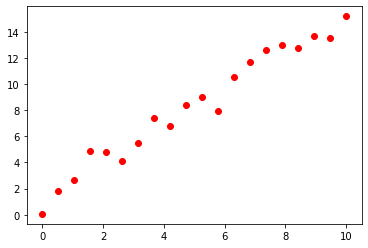

x shape: (20, 1)
(20,)


In [10]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(0,10, 20)
y = 1.5*x + 1

noise = np.random.normal(0,1,len(x))
ynoisy = y + noise


plt.scatter(x.reshape(-1,1), ynoisy.reshape(-1,1), facecolor='red')
plt.show()

x = np.matrix(x)
x = np.transpose(x)
print("x shape: {}".format(x.shape))
print(ynoisy.shape)

#### Question I.1 (5pts)

Write a function 'linearRegression_Loss' that takes as input the matrix encoding the prototypes, i.e.

$$\mathbf{X} = \left[
  \begin{array}{ccc}
   - & (\mathbf{x}^{(1)})^{T} & - \\
    - & (\mathbf{x}^{(2)})^{T} & - \\
             & \vdots    &          \\
    - & (\mathbf{x}^{(n)})^{T} & -
  \end{array}
\right]$$

where the dataset is given by $\left\{\mathbf{x}^{(i)}, t_i\right\}$ and each $\mathbf{x}^{(i)}\in \mathbb{R}^D$ with 
$$\mathbf{x}^{(i)} = \left[\begin{array}{c}
x^{(i)}_1\\
\vdots \\
x^{(i)}_n\end{array}\right]$$

The function should implement gradient descent steps on the loss function

$$\ell(\boldsymbol{\beta}) = \frac{1}{2N}\sum_{i=1}^N \left(t^{(i)} - \left(\boldsymbol{\beta}^T\mathbf{x}^{(i)} +\beta_0\right)\right)^2$$

Here $\mathbf{\beta}$ encodes the weights $\beta_1, \beta_2, \ldots, \beta_D$ of the variables $x^{(i)}_1, \ldots, x^{(i)}_{D}$. 

# Solution I.1: These are the steps used to return beta values 

 
## a. Mathematical Foundations:

1. Hypotheized Value: 

 $$y_{hat} = h_\beta(x) = \beta^T x + \beta_0$$
2. write linearRegression_Loss function without any summation/for loop

 $$l(\beta) = \frac{1}{2N}(t - (X\beta +\beta_0))^T(t - (X\beta  +\beta_0))$$

3. write linearRegression_Loss_gradient function without any summation/for loop

 $$ \triangledown l(\beta) =  \frac{1}{2N} *2 (t - (X\beta +\beta_0)) (-1)(X)^T $$

 $$ \triangledown l(\beta) =  \frac{-1}{N} (X)^T(t - (X\beta+\beta_0)) $$

 $$ \triangledown l(\beta_0) =  \frac{1}{2N} *2 (t - (X\beta +\beta_0))(-1) $$

 $$ \triangledown l(\beta_0) =  \frac{-1}{N}(t - (X\beta+\beta_0)) $$

4. Step size equation with regards to both $ \beta_1 /\beta ~\&~\beta_0 $ /bias:
 $$ \beta_{i+1} = \beta_i - \eta \triangledown l(\beta_i) $$
 $$ \beta_{0_{i+1}} = \beta_{0_i} - \eta \triangledown l(\beta_{0_i}) $$


## b. Programming these functions:

In [11]:
def compute_loss_function(X, t, beta, bias):
    '''
    Encodes linear regression loss. 
    The function should take as input a matrix of sample points X of size N by D (without the column of 1), 
    a vector of targets t (n dimensional),
    as well as a vector beta (D dimensional)
    and return a scalar value loss
    '''
    num_instances = X.shape[0]
    X_beta_product = np.dot(X, beta)
    X_beta_bias = X_beta_product + bias
    t_minus_X_beta = t - X_beta_bias
    mat_square = np.dot(t_minus_X_beta, np.transpose(t_minus_X_beta))
    loss = (1/(2*num_instances)) * mat_square
    return loss[0,0]

def compute_loss_function_gradient(X, t, beta, bias):
    '''
    Encodes linear regression loss. 
    The function should take as input a matrix of sample points X of size N by D (without the column of 1), 
    a vector of targets t (n dimensional),
    as well as a vector beta (D dimensional)
    and return a gradient (directional derivative) vector (D dimensional )
    '''
    num_instances = X.shape[0]
    X_beta_product = np.dot(X, beta)
    
    X_beta_bias = X_beta_product + bias
    #print("this is X_beta_bia",X_beta_bias )
    #print("this is t",t )
    t_minus_X_beta = t - X_beta_bias
    #print("this is t_minus_X_beta",t_minus_X_beta )

    mat_mult = np.dot(t_minus_X_beta, X)
    grad_beta = (-1/num_instances) * mat_mult
    # converting matrix to vector

    grad_beta = np.squeeze(np.asarray(grad_beta))
    grad_bias = (-1/num_instances) * np.sum(t_minus_X_beta)
    
    return grad_beta, grad_bias

def linearRegression_Loss(X, t):
    '''
    The function should take as input a matrix of sample points X 
    of size n by D (without the column of 1) as well as a vector of targets t (n dimensional) 
    and return vector of regression coefficients beta (D dimensional) & cost history for visualization
    '''
    k_iter = 4000
    learning_rate = 0.01
    num_features = X.shape[1]
    
    # vector of no. of feature dimenions
    beta = np.zeros(num_features) # Initialize beta to zero
    # scalar value
    bias = 1
    cost_history = []
    for iteration in range(k_iter):
        grad_beta, grad_bias = compute_loss_function_gradient(X, t, beta, bias)
        beta = beta - learning_rate * grad_beta
        bias = bias - learning_rate * grad_bias
        cost = compute_loss_function(X, t, beta, bias)
        cost_history.append(cost)
        if (iteration % 500 == 0):
            print("iter: {}  weight: {}  bias={}  cost={}".format(iteration, beta, bias, cost))

    return beta, bias, cost_history

## c. Plot Model and Error Minimzation
#### Question I.2 (3pts)

Apply your function to the dataset show above and display the resulting line.

# Solution 

1. Return the value of beta_1 and beta_0 from linearRegression_Loss 
2. compute y_hat 
$$y_{hat} = h_\beta(x) = \beta_1 x + \beta_0$$
3. Plot the resulting graph

iter: 0  weight: [0.49561579]  bias=1.0731954759752502  cost=15.486780599897749
iter: 500  weight: [1.4103742]  bias=1.2625383985678922  cost=0.2891668874346161
iter: 1000  weight: [1.40827016]  bias=1.2768235374060466  cost=0.28911937006513544
iter: 1500  weight: [1.40770783]  bias=1.2806414124434227  cost=0.289115975947596
iter: 2000  weight: [1.40755754]  bias=1.2816617854314751  cost=0.28911573350922043
iter: 2500  weight: [1.40751738]  bias=1.2819344923756657  cost=0.28911571619209314
iter: 3000  weight: [1.40750664]  bias=1.2820073765839715  cost=0.28911571495514815
iter: 3500  weight: [1.40750377]  bias=1.2820268557645838  cost=0.28911571486679444
beta1: [1.40750301]; beta0/bias: 1.28203205679186
Cost history:  [6.721020163735947, 3.0114386272003495, 1.4415798482035236, 0.7772296761625601, 0.49608141576456943, 0.37710026208389014, 0.3267465660128222, 0.3054353130304104, 0.29641453332814277]


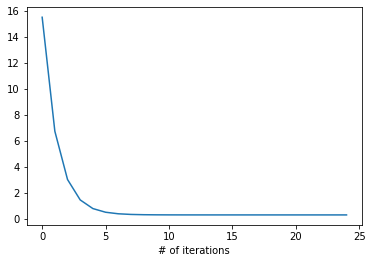

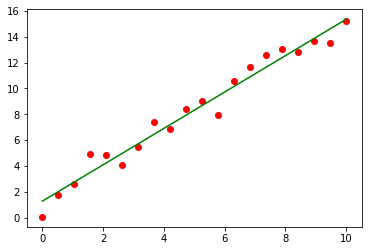

In [12]:
def plot_linearRegressions_results(X, t):
    '''
    Displaying the linear regression model
    '''
    beta_1, beta_0, cost_history = linearRegression_Loss(X, t)
    print("beta1: {}; beta0/bias: {}".format(beta_1, beta_0))
    print("Cost history: ",cost_history[1:10])
    #print(cost_history)
    N = [i for i in range(25)]
    plt.plot(N,cost_history[:25], label="error")
    plt.xlabel("# of iterations")
    
    plt.show()
    
    y_hat = beta_0 + beta_1[0] * x
    y_hat = np.squeeze(np.asarray(y_hat))
    plt.scatter(np.squeeze(np.asarray(x)), ynoisy, facecolor='red')
    plt.plot(np.squeeze(np.asarray(x)), y_hat, color='green')
    plt.show()
    
plot_linearRegressions_results(x, ynoisy)
#compute_loss_function(x, ynoisy, np.zeros(1), 1)

### Question I.3 (5pts)

We now want to study how a more complex model would behave on our noisy dataset. In order to 
avoid bad surprises, we will start by augmenting your model with a regularization term.

Extend your function 'linearRegression_Loss' with an parameter 'reg' to which we can assign one of the following values 
- 'ridge'
- 'lasso'
- 'none'

Corresponding to the following models (the last choice encoding the OLS formulation given earlier)

$$\ell_{\text{Ridge}}(\mathbf{\beta})  = \frac{1}{2N}\sum_{i=1}^N \left(t^{(i)} - \left(\mathbf{\beta}^T\mathbf{x}^{(i)} + \beta_0\right)\right)^2 + \lambda \sum_{i=1}^{D+1} |\beta_i|^2$$

$$\ell_{\text{LASSO}}(\mathbf{\beta})  = \frac{1}{2N}\sum_{i=1}^N \left(t^{(i)} - \left(\mathbf{\beta}^T\mathbf{x}^{(i)} + \beta_0\right)\right)^2 + \lambda \sum_{i=1}^{D+1} |\beta_i|$$

Your new function should also take an additional argument encoding the weight of the regularization (we will call it lambdaR).

# Solution I.3: Regularization on the Linear Regression Model 

## a. Mathematical Foundations:

Writing the above equation in vector matrix multipication without summation as follows:

 $$ l_{Ridge}(\beta) = \frac{1}{2N}(t - (X\beta +\beta_0))^T(t - (X\beta  +\beta_0)) + \lambda \beta^T\beta$$

Taking their gradient as follows:
    
 $$\triangledown l_{Ridge}(\beta) = \frac{-1}{N}(X)^T(t - (X\beta +\beta_0) + 2\lambda \beta $$
which is equivalent to: 

 $$\triangledown l_{Ridge}(\beta) = \triangledown l_{linear}(\beta) + 2\lambda \beta $$
so the updated step size for $\beta$ will be:

 $$ \beta_{i+1} = \beta_i - \eta [\triangledown l(\beta_i) + 2\lambda \beta_i]$$


Similarly, updating Lasso (Bonus work) as follows:

(a) if $\beta > 0 $, 
 $$l_{Lasso}(\beta) = \frac{1}{2N}(t - (X\beta +\beta_0))^T(t - (X\beta  +\beta_0)) + \lambda\beta$$

(b) elif $\beta < 0 $, 
 $$l_{Lasso}(\beta) = \frac{1}{2N}(t - (X\beta +\beta_0))^T(t - (X\beta  +\beta_0)) - \lambda\beta$$

(c) else:

 $$l_{Lasso}(\beta) = \frac{1}{2N}(t - (X\beta +\beta_0))^T(t - (X\beta  +\beta_0))$$

Taking their gradient as follows:

(a) if $\beta > 0 $:
    
$$\triangledown l_{Lasso > 0}(\beta) = \frac{-1}{N}(X)^T(t - (X\beta +\beta_0) + \lambda\beta  $$

which is equivalent to:
 
$$\triangledown l_{Lasso_(\beta > 0)}(\beta) = \triangledown l_{linear}(\beta) + \lambda\beta $$

so the updated step size for $\beta$ will be:

$$ \beta_{i+1} = \beta_i - \eta [\triangledown l(\beta_i) + \lambda\beta_i]$$

(b) if $\beta < 0 $:
$$\triangledown l_{Lasso < 0}(\beta) = \frac{-1}{N}(X)^T(t - (X\beta +\beta_0) - \lambda\beta  $$

which is equivalent to:
 
$$\triangledown l_{Lasso_(\beta < 0)}(\beta) = \triangledown l_{linear}(\beta) - \lambda\beta $$

so the updated step size for $\beta$ will be:

$$ \beta_{i+1} = \beta_i - \eta [\triangledown l(\beta_i) - \lambda\beta_i]$$
(c) if $\beta = 0 $:
 $$\triangledown l_{Lasso = 0}(\beta) = \triangledown l_{linear}(\beta)  $$
 
so the updated step size for $\beta$ will be:

$$ \beta_{i+1} = \beta_i - \eta [\triangledown l(\beta_i)]$$

## b. Programming these functions:

In [13]:
def regularized_linearRegression_Loss(X, t, reg, lambdaR):
    '''
    The function should take as input a matrix of sample points X 
    of size n by D (without the column of 1) as well as a vector of targets t (n dimensional) 
    and return vector of regression coefficients beta (D dimensional) & cost history for visualization
    '''
    #print(X, t, reg, lambdaR)
    k_iter = 4000
    learning_rate = 0.00001
    num_features = X.shape[1]
    
    beta = np.zeros(num_features) # Initialize beta to zero
    bias = 1
    cost_history = []
    for iteration in range(k_iter):
        
        grad_beta, grad_bias = compute_loss_function_gradient(X, t, beta, bias)
        if (reg == "ridge"):
            beta = beta - (learning_rate * (grad_beta + 2 * lambdaR * beta))
        elif (reg == "lasso"):
            ## to be done
            if (grad_beta[i-1] > 0): 
                beta = beta - (learning_rate * (grad_beta + lambdaR * beta))
            elif (grad_beta[i-1] < 0): 
                beta = beta - (learning_rate * (grad_beta - lambdaR * beta))
            else:
                beta = beta - (learning_rate * grad_beta)
        else:
            beta = beta - learning_rate * grad_beta
            
        bias = bias - learning_rate * grad_bias
    return beta, bias, cost_history

#### Question I.4. (5pts) 

Apply your regularized regression implementation to the data above after generating additional features of the form 
$[x^2, x^3, \ldots, x^p]$ for $p = 10$. Note that this implies that your implementation should be able to handle multiple features. 
On that line you should make sure that your gradient algorithm computes a gradient that encodes all the partial derivatives 
$$\text{grad}_{\boldsymbol{\beta}}\ell(\boldsymbol{\beta}) = \left(\frac{\partial \ell(\boldsymbol{\beta})}{\partial \beta_1}, \ldots, \frac{\partial \ell(\boldsymbol{\beta})}{\partial \beta_{D+1}}\right)$$

plot the result without regularization and for the Ridge regression formulation for a few values of $\lambda$ (let's says $\lambda = 0.1, 1, 10$ and $100$)






# Solution 
1. Num of features have been increase from 1 to 10 
$[x^2, x^3, \ldots, x^p]$ for $p = 10$

2. Due to some issue, for features more than 3 returns an infinity matrix of y_hat which is why $ p = 3 $ is taken

3. $ regularizedLinearRegressionLoss $ function is called to return the $\beta $ and $ bias $ values

4. Using the $\beta $ and $ bias $ values, $ y_(hat) $ is calculated using four values of $\lambda = 0.1, 1, 10$ and $100$)

for lambdaR value 0.1  on  ridge  regression yields this graph for 
Feature: x^1


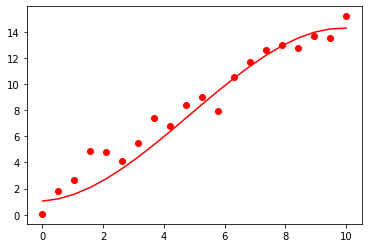

Feature: x^2


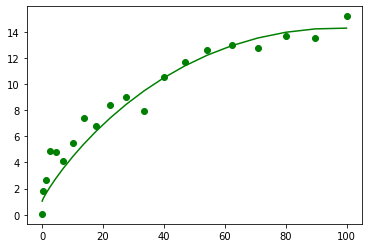

Feature: x^3


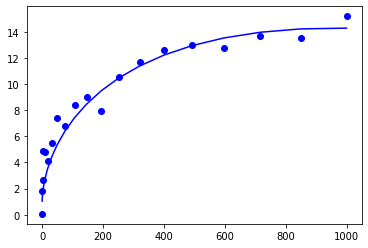

for lambdaR value 1  on  ridge  regression yields this graph for 
Feature: x^1


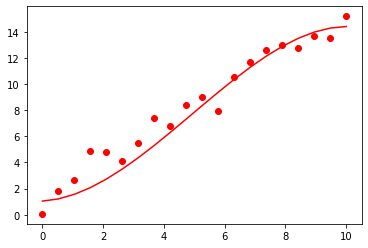

Feature: x^2


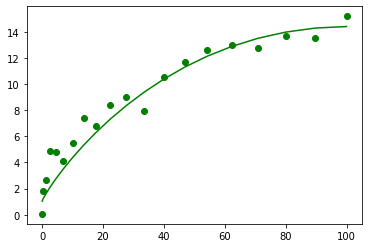

Feature: x^3


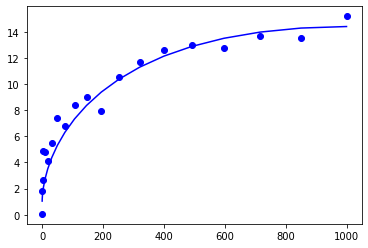

for lambdaR value 10  on  ridge  regression yields this graph for 
Feature: x^1


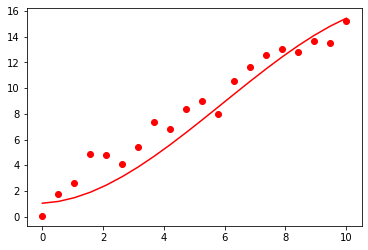

Feature: x^2


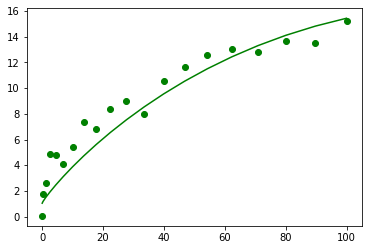

Feature: x^3


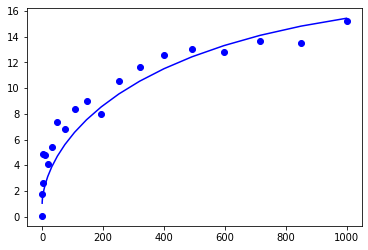

for lambdaR value 100  on  ridge  regression yields this graph for 
Feature: x^1


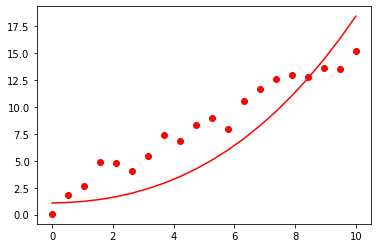

Feature: x^2


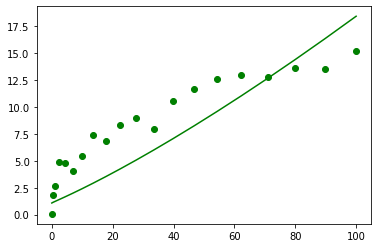

Feature: x^3


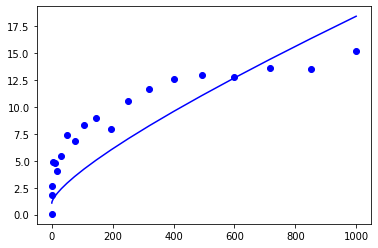

for lambdaR value 0.1  on  lasso  regression yields this graph for 
Feature: x^1


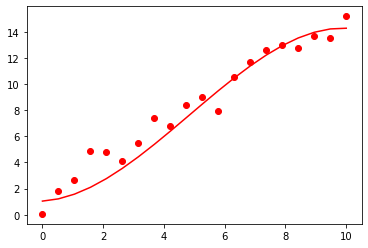

Feature: x^2


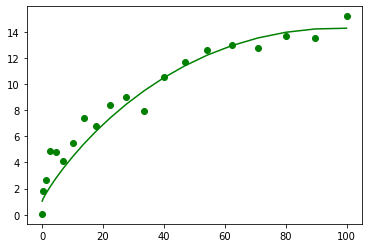

Feature: x^3


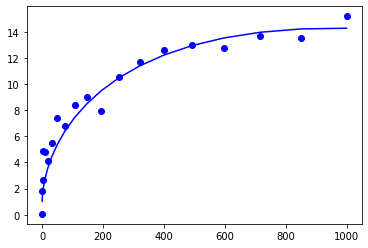

for lambdaR value 1  on  lasso  regression yields this graph for 
Feature: x^1


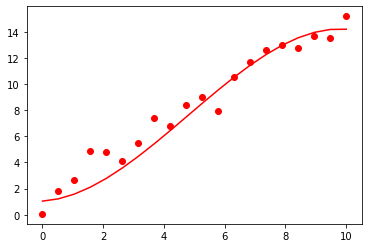

Feature: x^2


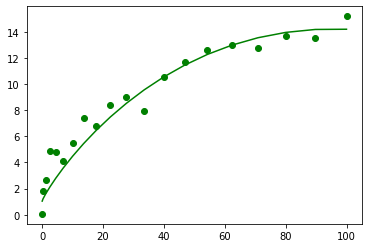

Feature: x^3


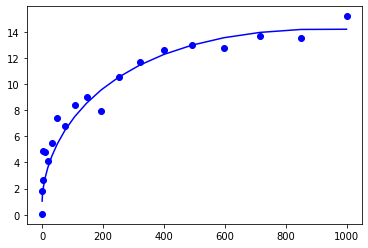

for lambdaR value 10  on  lasso  regression yields this graph for 
Feature: x^1


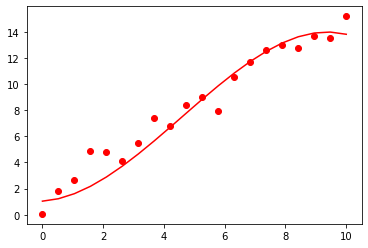

Feature: x^2


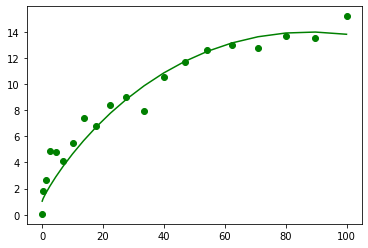

Feature: x^3


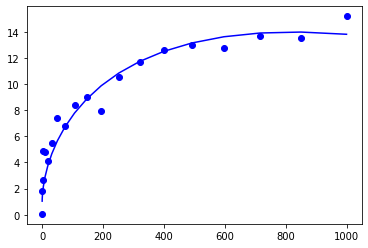

for lambdaR value 100  on  lasso  regression yields this graph for 
Feature: x^1


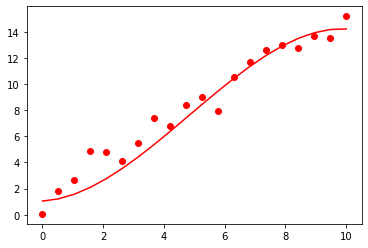

Feature: x^2


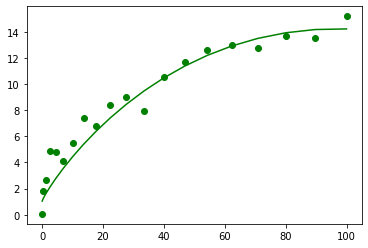

Feature: x^3


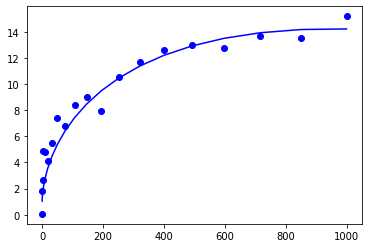

for lambdaR value 0.1  on  none  regression yields this graph for 
Feature: x^1


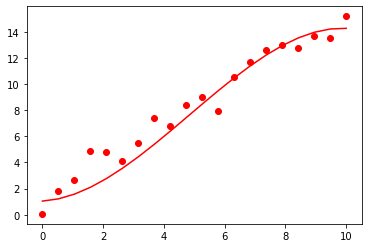

Feature: x^2


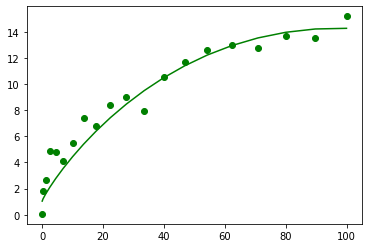

Feature: x^3


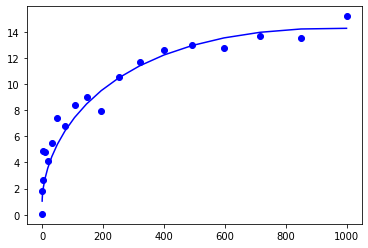

for lambdaR value 1  on  none  regression yields this graph for 
Feature: x^1


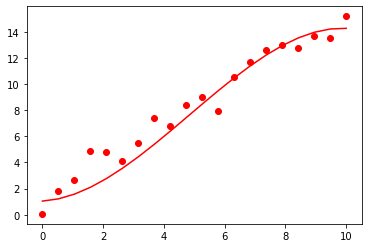

Feature: x^2


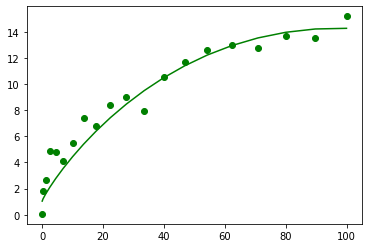

Feature: x^3


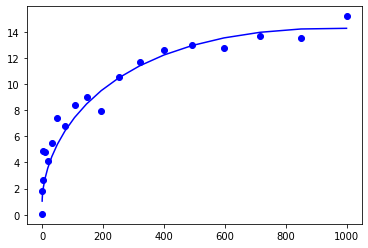

for lambdaR value 10  on  none  regression yields this graph for 
Feature: x^1


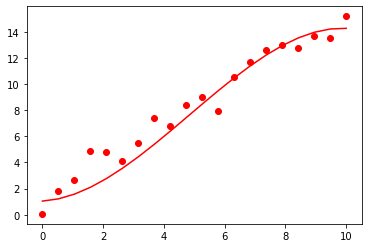

Feature: x^2


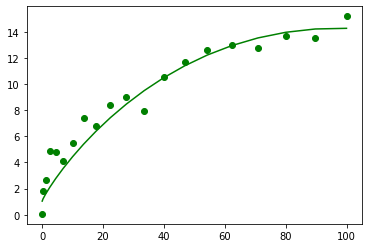

Feature: x^3


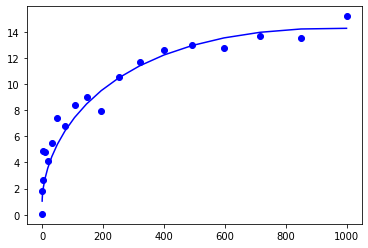

for lambdaR value 100  on  none  regression yields this graph for 
Feature: x^1


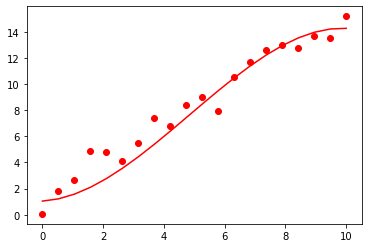

Feature: x^2


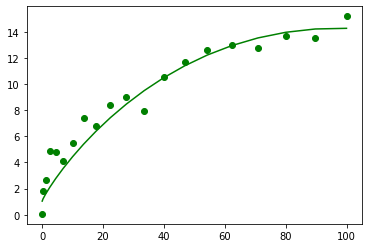

Feature: x^3


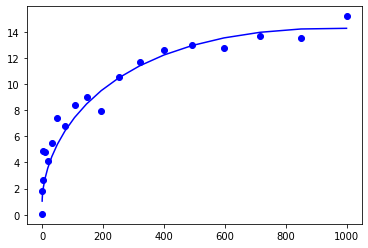

In [14]:
'''Use your implementation of linearRegression_Loss below'''

p = 3
N = 20
powers = np.arange(0,p) + 1

x = np.linspace(0,10, N)

X = np.zeros((N,p))

for i in powers:
    X[:,i-1] = np.power(x, i)

lambdaR = [0.1,1,10,100]
reg_type = ["ridge","lasso","none"]

bias = 1
beta_lambdar = []
for element in reg_type:
    for i in np.arange(0,len(lambdaR)):
        
        # func should take a string input for Ridge, Lasso, None
        beta, bias, cost_history = regularized_linearRegression_Loss(X, ynoisy, element, lambdaR[i])
        beta_lambdar.append(beta)
        print("for lambdaR value",lambdaR[i]," on ", element," regression yields this graph for ")
        
        y_hat_1 = np.dot(X,np.transpose(beta_lambdar[-1])) + bias

        print("Feature: x^1")
        plt.scatter(X[:,0], ynoisy, facecolor='red')
        plot = plt.plot(X[:,0], y_hat_1, color='red')
        plt.show(plot)
        plt.close('all')
        
        print("Feature: x^2")
        plt.scatter(X[:,1], ynoisy, facecolor='green')
        plot = plt.plot(X[:,1], y_hat_1, color='green')
        plt.show(plot)
        plt.close('all')
        
        print("Feature: x^3")
        plt.scatter(X[:,2], ynoisy, facecolor='blue')
        plot = plt.plot(X[:,2], y_hat_1, color='blue')
        plt.show(plot)
        plt.close('all')
            

### Question II. Simplified Stock prediction (12pts)

The lines below can be used to download stock values. As you can see, we will focus on the evolution of the Google stock between December 1st 2004 and October 14th 2005. 

[*********************100%***********************]  1 of 1 completed


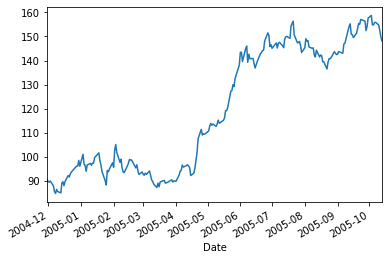

In [15]:
import yfinance as yf
# Get the data of the stock AAPL
data = yf.download('GOOG','2004-12-01','2005-10-14')
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

#### Question II.1. (5pts)

Now that you have tested your linear regression implementations, we will turn to the regression implementation of scikit-learn. In this exercise, we will use scikit learn to fit a simplified prediction model. We will take an order $p$ prediction model for $p=5$, that is a model of the form

$$\text{value}_{t} = \alpha_0 + \sum_{i=1}^{P} \alpha_i\; \text{value}_{t-i}$$

# Solution
1. For the first five values of $ X $, use the first value of $ data[Adj Close][0] $. Look at first FOR Loop
2. Use embedded FOR loop 
3. Declare Scikit Linear Model and its parameters 
4. Plot the regression line and the graph line

Intercept is:  0.6718582975730101


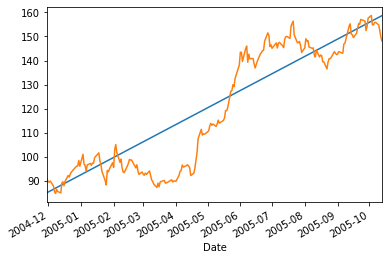

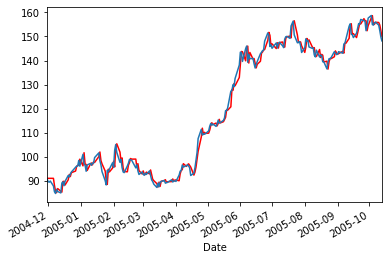

In [16]:
import sklearn as skl
from sklearn import linear_model
from sklearn.linear_model import Ridge


'''Put your code here'''
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.DataFrame(data = data)
date_index = df.index

order_p = 5 
num_of_instances = len(data)
X_train_mat = np.zeros((len(date_index),order_p))

for count in range(0,6):
    for k in range(0,count+1):
        X_train_mat[count] = data['Adj Close'][0]

for i in range(order_p,len(data)):
    for j in range(0,len(X_train_mat[i])):
        X_train_mat[i][j] = data['Adj Close'][i - j - 1]


reg = linear_model.Ridge(alpha = 0.1, fit_intercept = True, normalize = False)
reg.fit(X_train_mat,data['Adj Close']) 
pred = reg.predict(X_train_mat)

print("Intercept is: ",reg.intercept_)
plt.plot([min(date_index), max(date_index)],[min(pred),max(pred)])
data['Adj Close'].plot()
plt.show()

plt.plot(date_index, pred, color = 'red')
data['Adj Close'].plot()
plt.show()



#### Question II.2. (5pts)

On top of the previous values, we would like to capture seasonal trends. Although we would ideally need more than one year of data, we stick to the dataset that you downloaded above. Add a variable to your model that encodes the day of the year at which the stock value is measured. I.e. we want a model of the form

$$\text{value}_{t} = \alpha_0 + \sum_{i=1}^{P} \alpha_i\; \text{value}_{t-i} + \alpha_{P+1} t$$

where $t_i$ encodes the time information (this should be a single number between $1$ and $365$)

# Solution 

1. Define a function that find the nth number of the day provided the date 
2. Add the date to the X matric 
3. Reshape the matrices and re-run the Scikit Linear regression model

In [17]:
import time 
from datetime import datetime, date
def nth_day_of_year(date):
    date = pd.to_datetime(date, format='%Y%m%d')
    new_year_day = pd.Timestamp(year=date.year, month=1, day=1)
    day_of_the_year = (date - new_year_day).days + 1
    return day_of_the_year

Intercept is:  0.6734797488501414


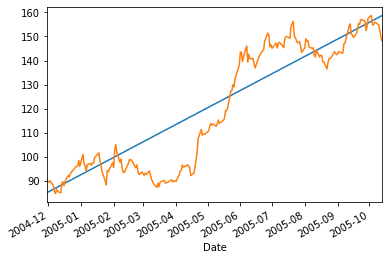

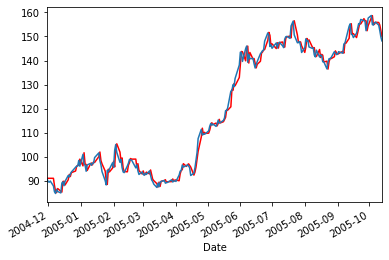

In [18]:

date_nth = []
for k in date_index:
    date = nth_day_of_year(k)
    date_nth.append(date)

X_new_mat = []
for i in range(0, len(X_train_mat)):
    X_new_mat = np.append(X_new_mat, date_nth[i])

X_new_mat = np.reshape(X_new_mat, (221,1))
X_train_mat = np.hstack((X_train_mat, X_new_mat))


reg = linear_model.Ridge(alpha = 0.1, fit_intercept = True, normalize = False)
reg.fit(X_train_mat,data['Adj Close']) 
pred = reg.predict(X_train_mat)
print("Intercept is: ",reg.intercept_)


plt.plot([min(date_index), max(date_index)],[min(pred),max(pred)])
data['Adj Close'].plot()
plt.show()

plt.plot(date_index, pred, color = 'red')
data['Adj Close'].plot()
plt.show()

#### Question II.3. (2pts)

Once you have learned your models, load the the history of google stocks for the year 2006 and apply your model to get the predicted prices for all $t = '01-01-2006'$ to $t = '12-01-2006'$. Then compute the prediction error as 

$$\text{err} = \frac{1}{365}\sum_{t=1}^{365} (\hat{\text{value}}_{\text{pred}, t} - \text{value}_t)^2$$

1. Use II.2 code to find the pred values for the stock in 2006 
2. Substract the pred values from the actual values
3. To remove summation of a square of matrices, do following: 
$$ \sum_{t=1}^{365}(\hat{\text{value}}_{\text{pred}, t} - \text{value}_t)^2   =  (\hat{\text{value}}_{\text{pred}, t} - \text{value}_t)^T(\hat{\text{value}}_{\text{pred}, t} - \text{value}_t)$$
4. Divide by 365 to calculate prediction error for the year and by 231 to calculate prediction error for the working days of the year
# Answer
5. Prediction error for the the year =$ 13.09 $ 
6. Prediction error for the working days = $ 20.69 $ 

[*********************100%***********************]  1 of 1 completed


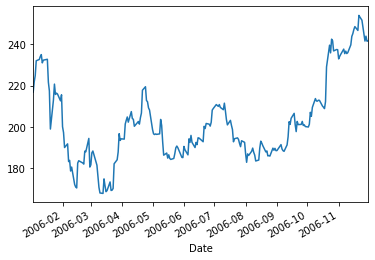

Prediction error for weekdays (i.e. 231 working days of 2006) is : [[20.69699803]] whereas Prediction error for the whole year is [[13.09864807]]


In [19]:
import yfinance as yf
# Get the data of the stock AAPL
data = yf.download('GOOG','2006-01-01','2006-12-01')
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

#X_train_mat = np.matrix(data['Adj Close'])

X_train_mat = np.zeros((len(data.index),5))

for count in range(0,6):
    for k in range(0,count+1):
        X_train_mat[count] = data['Adj Close'][0]

for i in range(order_p,len(data)):
    for j in range(0,len(X_train_mat[i])):
        X_train_mat[i][j] = data['Adj Close'][i - j - 1]

date_nth = []
for k in data.index:
    date = nth_day_of_year(k)
    date_nth.append(date)

X_new_mat = []
for i in range(0, len(X_train_mat)):
    X_new_mat = np.append(X_new_mat, date_nth[i])

X_new_mat = np.reshape(X_new_mat,(231,1))
X_train_mat = np.hstack((X_train_mat, X_new_mat))

reg = linear_model.Ridge(alpha = 0.1, fit_intercept = True, normalize = False)
reg.fit(X_train_mat,data['Adj Close']) 
pred = reg.predict(X_train_mat)


data_mat = np.matrix(data['Adj Close'])
pred_mat = np.matrix(pred)

err = np.subtract(pred_mat, data_mat)
error_weekday = (1/231)*(np.dot(err,np.transpose(err)))
error_whole_year = (1/365)*(np.dot(err,np.transpose(err)))

print("Prediction error for weekdays (i.e. 231 working days of 2006) is : {} whereas Prediction error for the whole year is {}".format(error_weekday,error_whole_year))


### Bonus (2pts) 

A popular family of models for time series analysis is the family of ARMA models. The extension of those models to non stationnarity is known as ARIMA (for Autoregressive Integrated Moving Average). It is possible to access those models through the 'statsmodels' module : https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html

Try to improve your predictions by fitting an ARIMA model to your data.